### Importing the Libraries

In [2]:

# Importing for Data Manipulation
import pandas as pd
import numpy as np
import joblib

# Importing for Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Importing the Libraries for Model Building
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

# Importing the libraries for the different algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# Importing the libraries for Artificial Neural Network ( ANN )

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Reading the Dataset

df = pd.read_csv('PGS_Loan_train.csv')
test = pd.read_csv('PGS_Loan_test.csv')
test_copy = pd.read_csv('PGS_Loan_test.csv')

In [4]:

# Viewing the training dataframe 

df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:

# Viewing the test Dataframe

test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [6]:

# Viewing the Shape of the data 

df.shape

(58645, 13)

In [7]:

# Checking the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:

# Checking for the null values

df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:

# Checking the description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


> __Function for Histogram and Box Plots__

In [10]:

# Functions for histogram and box plots

def viz_box_hist(dataframe, x_value):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot the histogram on the first axis (axes[0])
    sns.histplot(data = dataframe, x = x_value, ax = axes[0], kde = True)
    axes[0].set_title(str(x_value) + ' Distribution (Histogram)')
    
    # Plot the box plot on the second axis (axes[1])
    sns.boxplot(data = dataframe, x = x_value, ax = axes[1])
    axes[1].set_title(str(x_value) + ' Distribution (Boxplot)')

> __Function to build the Countplot__

In [11]:

# Function for Plotting the Normal Plot

def viz_count_plot(dataframe, value):
    plt.figure(figsize = (12 ,6))
    sns.countplot(data = dataframe, x = value, hue = value)
    plt.show()

> __Function to build the Confusion matrix and the Classification report__

In [12]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    
    '''
    fig, ax = plt.subplots(1, 2, figsize = (15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ax[0] = sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = '', linewidths = 0.5, ax = ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize = 18)
    ax[0].set_ylabel('Actual labels', fontsize = 18)
    ax[0].set_title('Confusion Matrix', fontsize = 25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(classification_report(y_test, y_pred, digits = 3, output_dict = True)).T
    cr.drop(columns = 'support', inplace = True)
    ax[1] = sns.heatmap(cr, cmap = 'Blues', annot = True, fmt = '0.3f', linewidths = 0.5, ax = ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

> __Function for plotting the ROC-AUC__

In [13]:

def plot_roc_auc(model, X_test, y_test, model_name="Model"):
    # Calculate the predicted probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute the ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC-AUC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


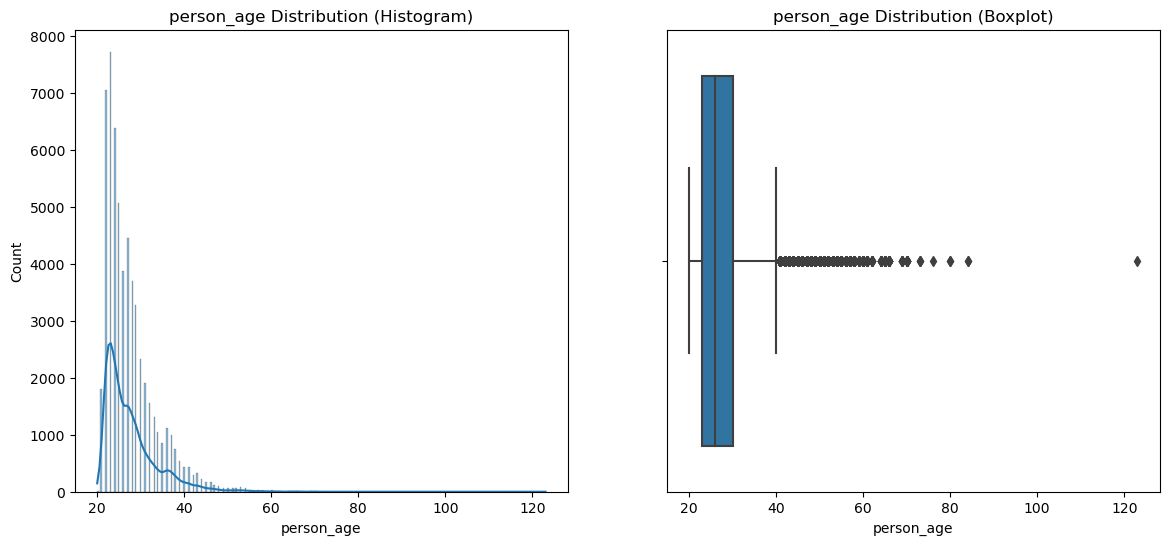

In [14]:
viz_box_hist(df, 'person_age')

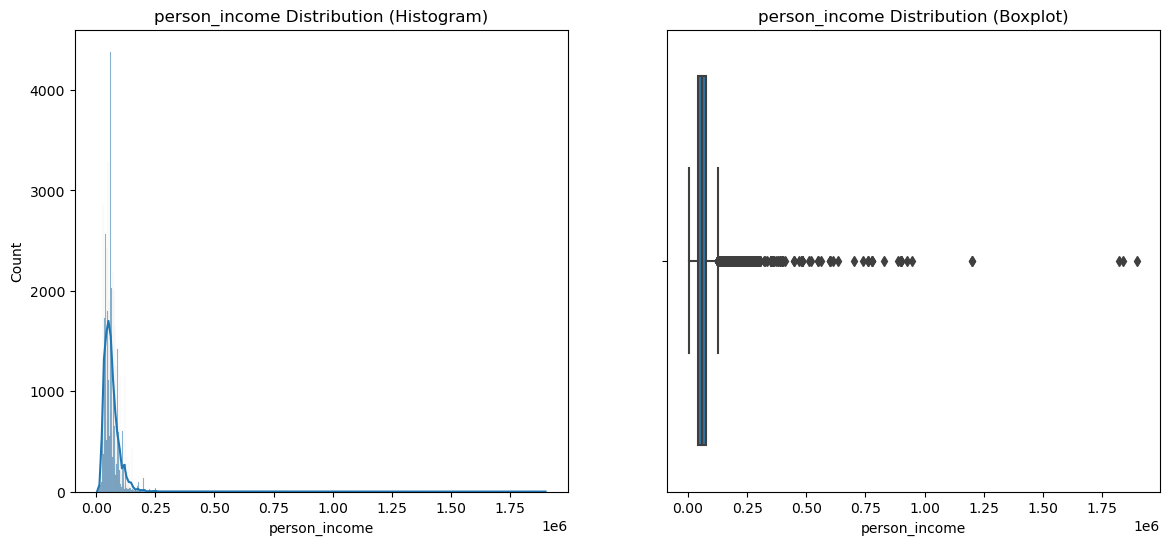

In [15]:
viz_box_hist(df, 'person_income')

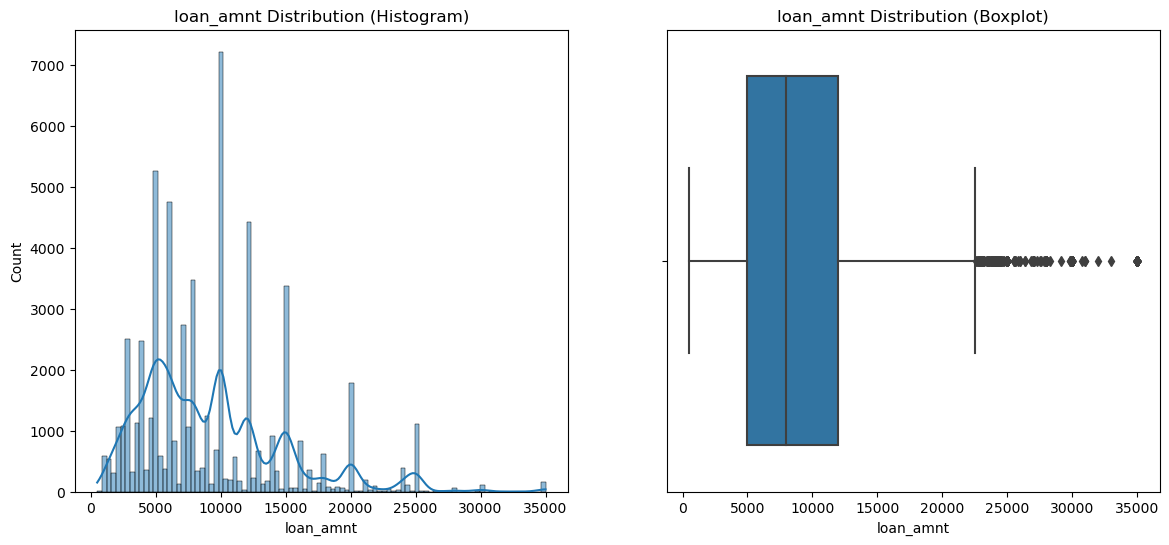

In [16]:
viz_box_hist(df, 'loan_amnt')

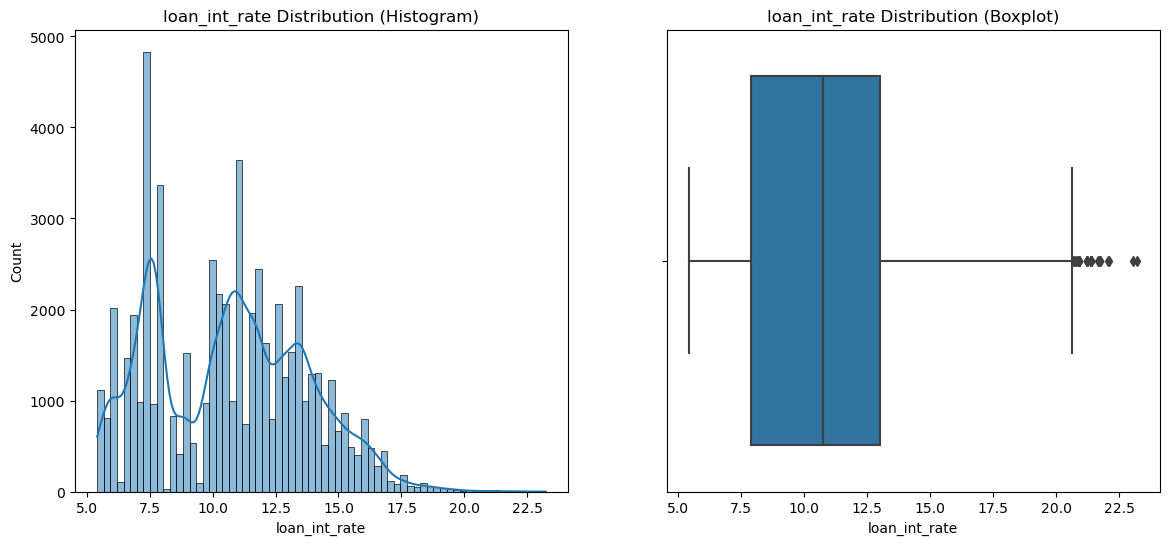

In [17]:
viz_box_hist(df, 'loan_int_rate')

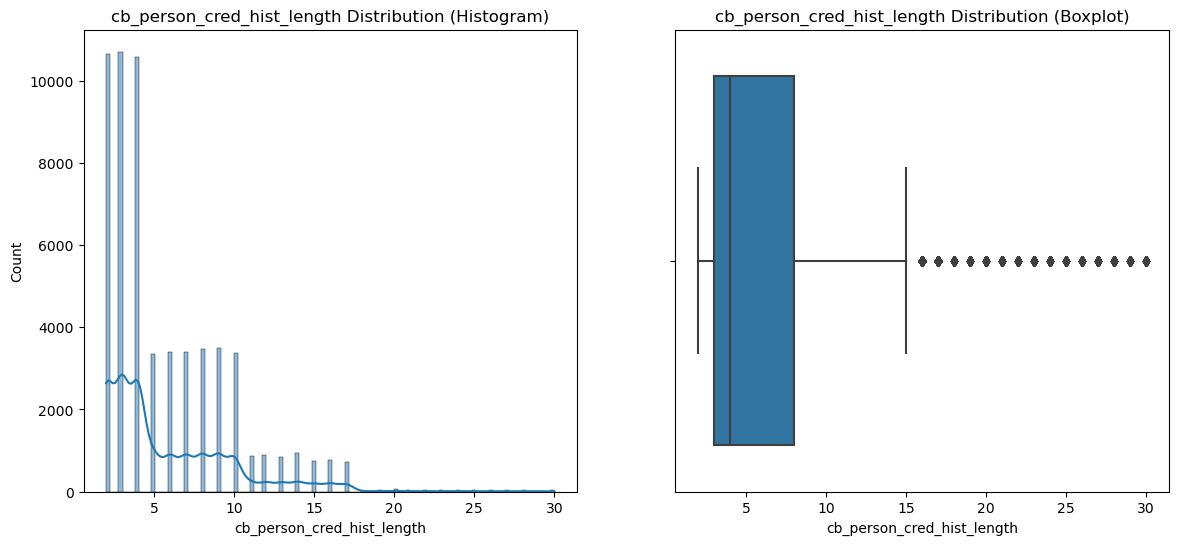

In [18]:
viz_box_hist(df, 'cb_person_cred_hist_length')

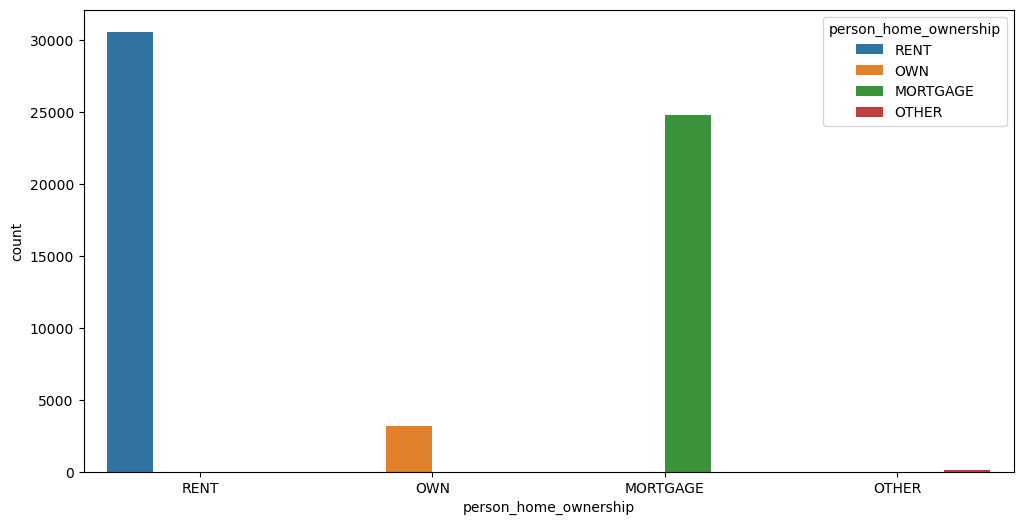

In [19]:
viz_count_plot(df, 'person_home_ownership')

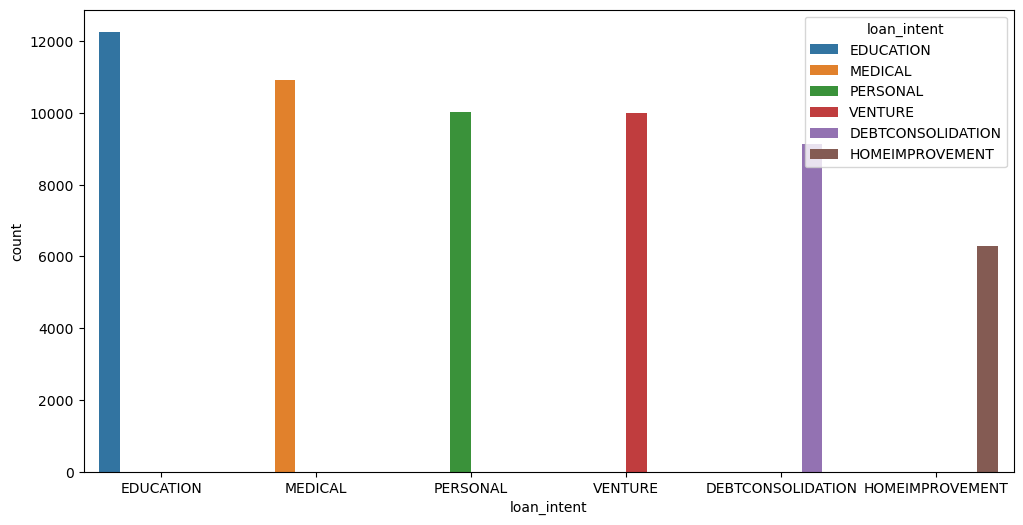

In [20]:
viz_count_plot(df, 'loan_intent')

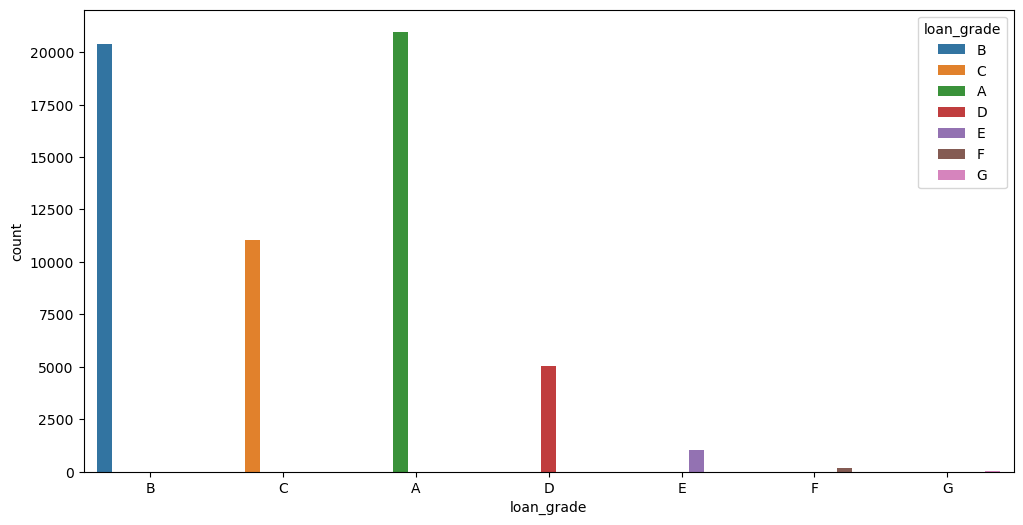

In [21]:
viz_count_plot(df, 'loan_grade')

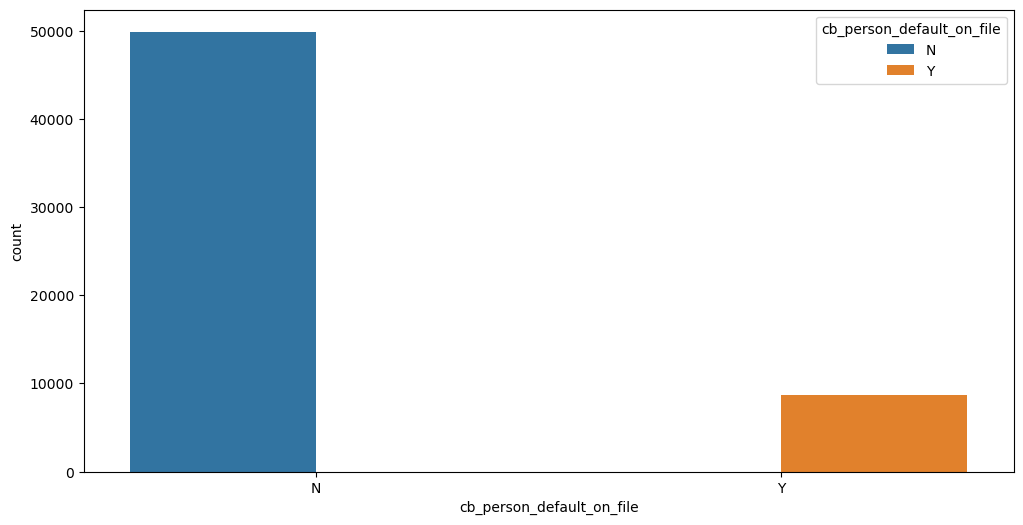

In [22]:
viz_count_plot(df, 'cb_person_default_on_file')

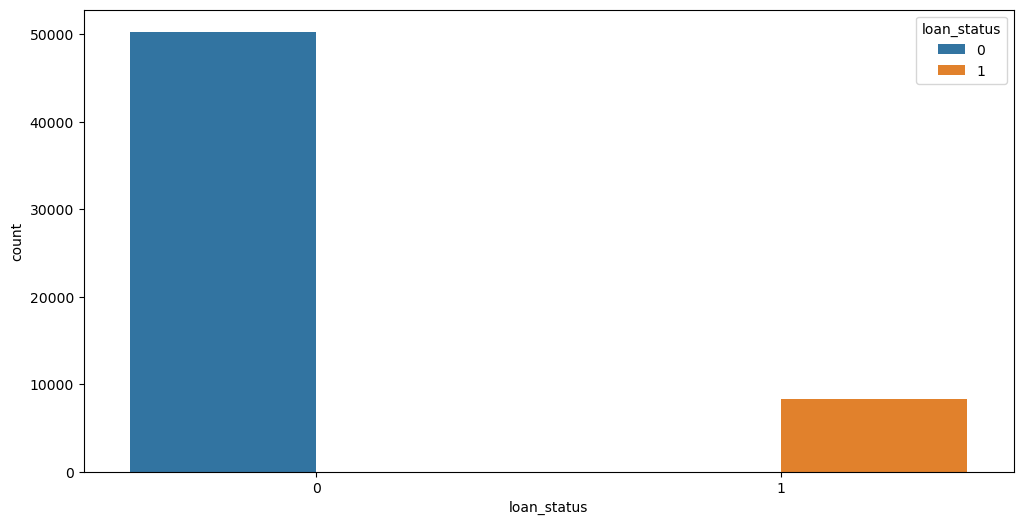

In [23]:
viz_count_plot(df, 'loan_status')

In [24]:
df['loan_status'].value_counts()

0    50295
1     8350
Name: loan_status, dtype: int64

In [25]:

# Functions for histogram and box plots

def viz_box_hist_2(dataframe, series):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot the histogram on the first axis (axes[0])
    sns.histplot(data = dataframe, x = str(x_value), ax = axes[0], kde = True)
    axes[0].set_title(str(x_value) + ' Distribution (Histogram)')
    
    # Plot the box plot on the second axis (axes[1])
    sns.boxplot(data = dataframe, x = str(x_value), ax = axes[1])
    axes[1].set_title(str(x_value) + ' Distribution (Boxplot)')

In [26]:
# There are outliers in age and income So we will be capping the data frame inorder to remove the outliers

print(f'The No. Records before Outlier Removal : {df.shape}')

df = df[(df['person_age'] <= 50)]
df = df[(df['person_income'] <= 200000)]

print(f'The No. Records after Outlier Removal : {df.shape}')

The No. Records before Outlier Removal : (58645, 13)
The No. Records after Outlier Removal : (57905, 13)


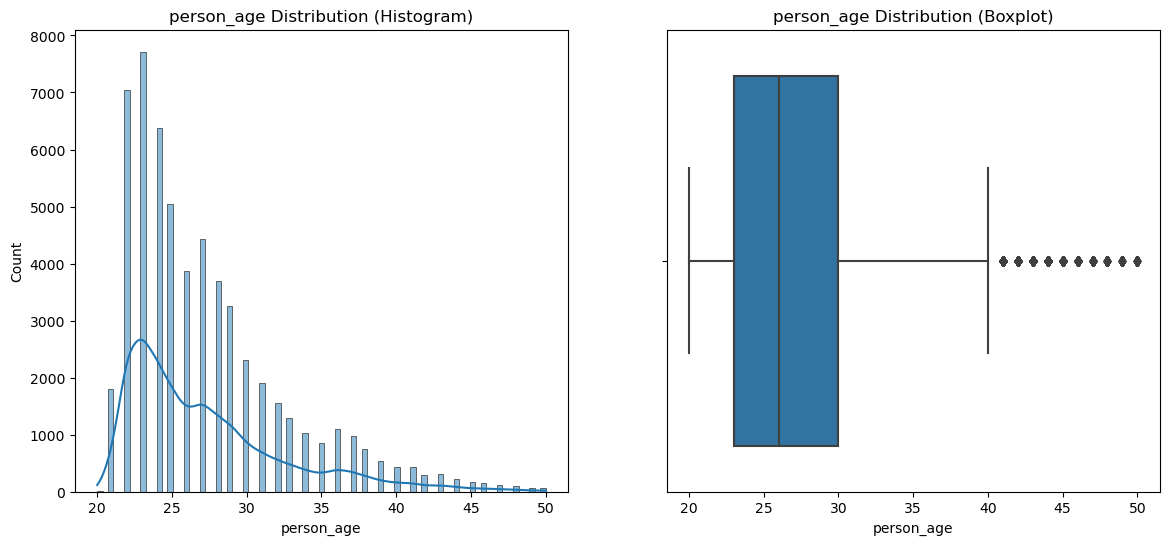

In [27]:
viz_box_hist(df, 'person_age')

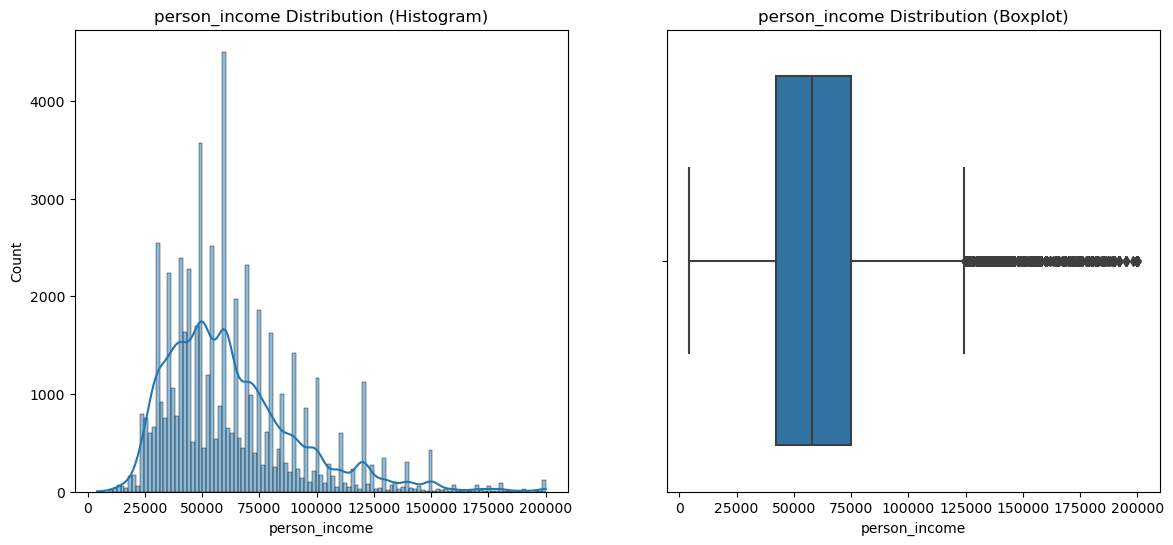

In [28]:
viz_box_hist(df, 'person_income')

### Doing the Mapping on the Df and the Test data 

In [29]:
df['person_home_ownership'].value_counts()

RENT        30267
MORTGAGE    24467
OWN          3084
OTHER          87
Name: person_home_ownership, dtype: int64

In [30]:
df['person_home_ownership'] = df['person_home_ownership'].map({'RENT' : 1, 
                                                               'MORTGAGE' : 2,
                                                               'OWN' : 3,
                                                               'OTHER' : 4})

In [31]:
test['person_home_ownership'] = test['person_home_ownership'].map({'RENT' : 1, 
                                                               'MORTGAGE' : 2,
                                                               'OWN' : 3,
                                                               'OTHER' : 4})

In [32]:
df['loan_intent'].value_counts()

EDUCATION            12207
MEDICAL              10819
VENTURE               9930
PERSONAL              9667
DEBTCONSOLIDATION     9048
HOMEIMPROVEMENT       6234
Name: loan_intent, dtype: int64

In [33]:
df['loan_intent'] = df['loan_intent'].map({'EDUCATION' : 1,
                                           'MEDICAL' : 2,
                                           'VENTURE' : 3,
                                           'PERSONAL' : 4,
                                           'DEBTCONSOLIDATION' : 5,
                                           'HOMEIMPROVEMENT' : 6})

In [34]:
test['loan_intent'] = test['loan_intent'].map({'EDUCATION' : 1,
                                           'MEDICAL' : 2,
                                           'VENTURE' : 3,
                                           'PERSONAL' : 4,
                                           'DEBTCONSOLIDATION' : 5,
                                           'HOMEIMPROVEMENT' : 6})

In [35]:
df['loan_grade'].value_counts()

A    20734
B    20143
C    10886
D     4967
E      998
F      144
G       33
Name: loan_grade, dtype: int64

In [36]:
df['loan_grade'] = df['loan_grade'].map({'A' : 1,
                                         'B' : 2,
                                         'C' : 3,
                                         'D' : 4,
                                         'E' : 5,
                                         'F' : 6,
                                         'G' : 7})

In [37]:
test['loan_grade'] = test['loan_grade'].map({'A' : 1,
                                         'B' : 2,
                                         'C' : 3,
                                         'D' : 4,
                                         'E' : 5,
                                         'F' : 6,
                                         'G' : 7})

In [38]:
df['cb_person_default_on_file'].value_counts()

N    49329
Y     8576
Name: cb_person_default_on_file, dtype: int64

In [39]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'N' : 1,
                                                                       'Y' : 2})

In [40]:
test['cb_person_default_on_file'] = test['cb_person_default_on_file'].map({'N' : 1,
                                                                       'Y' : 2})

In [41]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,1,0.0,1,2,6000,11.49,0.17,1,14,0
1,1,22,56000,3,6.0,2,3,4000,13.35,0.07,1,2,0
2,2,29,28800,3,8.0,4,1,6000,8.90,0.21,1,10,0
3,3,30,70000,1,14.0,3,2,12000,11.11,0.17,1,5,0
4,4,22,60000,1,2.0,2,1,6000,6.92,0.10,1,3,0


In [42]:
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,1,3.0,6,6,25000,15.76,0.36,1,2
1,58646,26,96000,2,6.0,4,3,10000,12.68,0.10,2,4
2,58647,26,30000,1,5.0,3,5,4000,17.19,0.13,2,2
3,58648,33,50000,1,4.0,5,1,7000,8.90,0.14,1,7
4,58649,26,102000,2,8.0,6,4,15000,16.32,0.15,2,4


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57905 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          57905 non-null  int64  
 1   person_age                  57905 non-null  int64  
 2   person_income               57905 non-null  int64  
 3   person_home_ownership       57905 non-null  int64  
 4   person_emp_length           57905 non-null  float64
 5   loan_intent                 57905 non-null  int64  
 6   loan_grade                  57905 non-null  int64  
 7   loan_amnt                   57905 non-null  int64  
 8   loan_int_rate               57905 non-null  float64
 9   loan_percent_income         57905 non-null  float64
 10  cb_person_default_on_file   57905 non-null  int64  
 11  cb_person_cred_hist_length  57905 non-null  int64  
 12  loan_status                 57905 non-null  int64  
dtypes: float64(3), int64(10)
memory

In [44]:

# Removing the columns that are not useful 
df.drop(['id'], axis = 1, inplace = True)


In [45]:

# Removing the Column from the test data
test.drop(['id'], axis = 1, inplace = True)


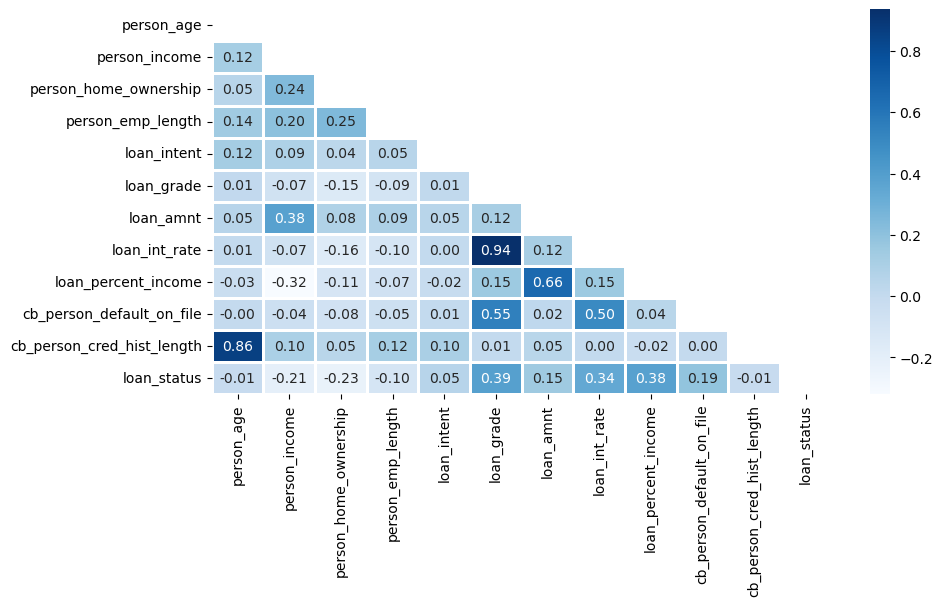

In [46]:

# Calculating the correlation matrix for the DataFrame
corr = df.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr, 
    annot = True,           # Annotates each cell with the correlation coefficient
    fmt = '.2f',            # Formats the annotations to 2 decimal places
    linewidths = 0.725,     # Adds a line between cells
    linecolor = 'white',    # Color of the lines between cells
    mask = np.triu(corr),   # Masks the upper triangle of the heatmap to avoid redundancy
    cmap = 'Blues'          # Color map for the heatmap
)
plt.show()



In [47]:

# Splitting the data into X and y 

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [48]:
# Making a copy of X and y Because when using the ANN we will have to use the min max Scalar on it

X_copy = X.copy()
y_copy = y.copy()


In [42]:

# Standardizing the data 

sc = StandardScaler()

X = sc.fit_transform(X)

In [125]:

# Stadardizing the test data too

test = sc.fit_transform(test)

In [43]:

# Making the object for SMOTE as we are implementing Oversmpling of the data

ost = SMOTETomek()
X_osto, y_osto = ost.fit_resample(X, y)

In [44]:
# Checking the Shape of X Columns and y Columns

print(f'Shape of X : {X_osto.shape}')
print(f'Shape of y : {y_osto.shape}')

Shape of X : (98844, 11)
Shape of y : (98844,)


> __Now have to work with X_osto --> X and y_sto --> y__

In [45]:

# Splitting the data into Train and test split
X_train, X_test, y_train, y_test = train_test_split(X_osto, y_osto, test_size = 0.1, random_state = 10, stratify = y_osto)

In [46]:
# Checking the Shapes of the Splits

print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y-test : {y_test.shape}')


Shape of X_train : (88959, 11)
Shape of y_train : (88959,)
Shape of X_test : (9885, 11)
Shape of y-test : (9885,)


> __Model Building__

<div style="text-align: center;">
    <h1>Logistic Regression</h1>
</div>


In [47]:

# Making the object of the Logistic Regression adn fitting the model
lor = LogisticRegression()
lor_1 = LogisticRegression()

lor.fit(X_train, y_train)

LogisticRegression()

In [48]:

# Making the Predictions on the Model
y_pred_lor = lor.predict(X_test)

In [49]:
# Viewing the confusion matrix

confusion_matrix(y_test, y_pred_lor)

array([[4016,  926],
       [ 878, 4065]], dtype=int64)

In [50]:
# Calculating the Accuracy of the model 

lor_accuracy_score = accuracy_score(y_test, y_pred_lor)
lor_accuracy_score

0.8175012645422357

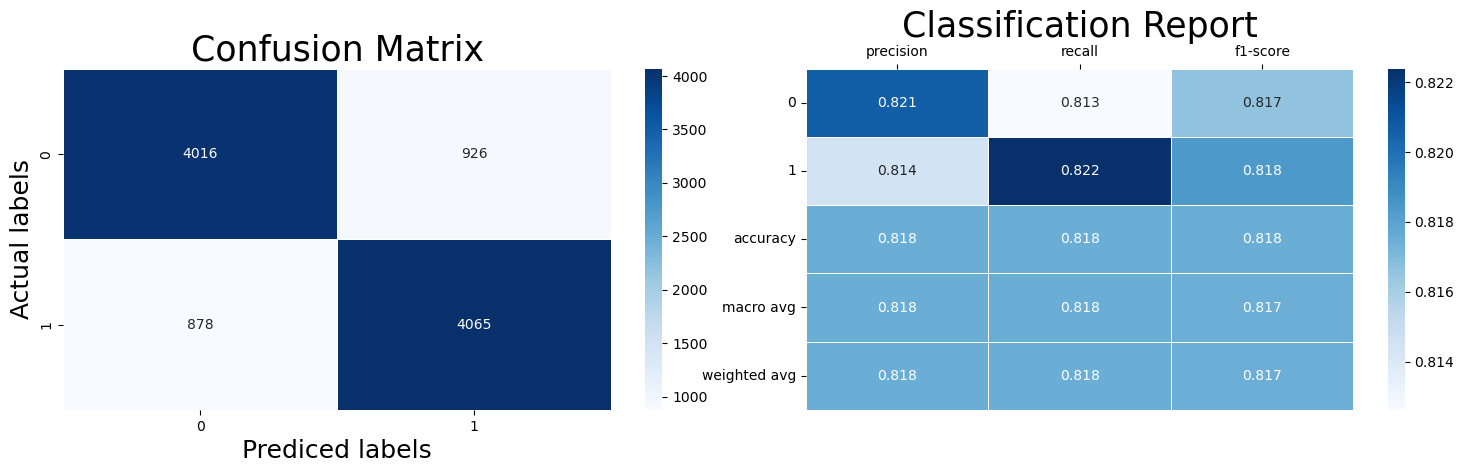

In [51]:
# PLotting the Results 

plot_result(y_pred_lor)

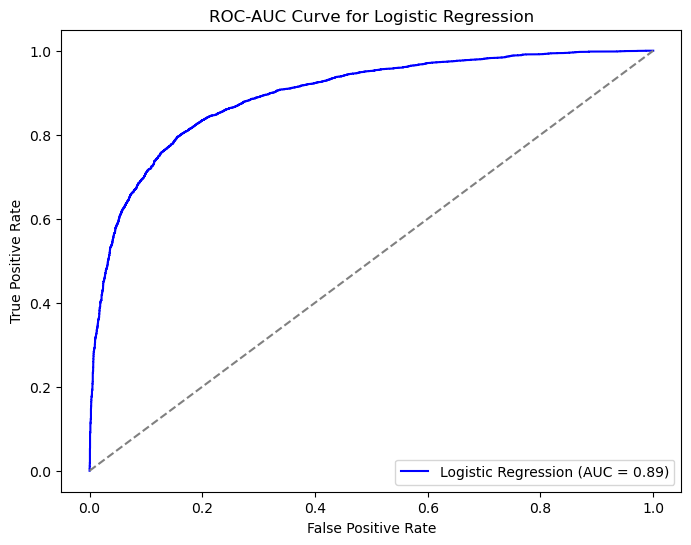

In [52]:
plot_roc_auc(lor, X_test, y_test, model_name = 'Logistic Regression')

In [53]:

# Define K-Fold with K=5

kf = KFold(n_splits=5, shuffle=True, random_state = 10)


In [54]:

# Perform cross-validation

scores = cross_val_score(lor_1, X_osto, y_osto, cv = kf, scoring='accuracy')


In [55]:
print(f'Cross-Validation Scores: {scores}')
print(f'Average Accuracy: {scores.mean():.2f}')


Cross-Validation Scores: [0.81688502 0.82062826 0.81956599 0.8182508  0.81384055]
Average Accuracy: 0.82


<div style="text-align: center;">
    <h1>KNN (K-Nearest Neighbours)</h1>
</div>


In [56]:
# # Writing a for loop so that we can see whcih value of k ivesthe best accuracy

# scores = []                                           # Making the Score list, so that the accuracy scores can be added

# for k in range(1, 16):
#     knn = KNeighborsClassifier(n_neighbors = k)       # Making the Object of the Class KNeighboursClassifier
#     knn.fit(X_train, y_train)                         # Fitting the Model
#     y_pred_knn = knn.predict(X_test)                  # Predicting how the model works on the test data
#     scores.append(accuracy_score(y_test, y_pred_knn)) # Appending the accuracy scores in the scores list
    

In [57]:
# # Making a plot so that we can see which value of k best suits the model

# plt.plot(range(1, 16), scores)
# plt.xlabel('K Values')
# plt.ylabel('Accuracy Scores')
# plt.title('KNN Algorithm')
# plt.show()

> __By seeing the following graph we are able to see that the KNN is not the best suitable algorithm for the fowllowing dataset as there are many dimension in the data set and with each and every step when the K value i.e the neighbour value is changed then the accuracy keeps on changing and also the accuracy keeps on decreasin or dipping down as we are increasing the value of K.__

<div style="text-align: center;">
    <h1>SVM Classifier ( Hyper Parameter Tuning ) Using GridSearchCV</h1>
</div>


In [58]:
# Making the Parameter grid that will be used in the SVM Classifier

param = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

In [59]:
# # Making the objects for SVM and the GSCV and fitting the Model

# svmgscv = SVC()                              # Making the object for the class SVC

# gscv = GridSearchCV(estimator = svmgscv,     # Making the object for the GridSearch and adding the Parameters
#                     param_grid = param,
#                     scoring = 'accuracy')    

# gscv.fit(X_train, y_train)                   # Fitting the model


In [60]:
# # Getting the Best parameter for the SVM Classifier using the GridSearchCV

# gscv.best_params_

In [61]:
# # Getting the best Model from GridsearchCV

# best_svc_gscv = gscv.best_estimator_

In [62]:
# # Predicting the Test set results

# y_pred_svcgscv = best_svc_gscv.predict(X_test)

In [63]:
# # Viewing the Confusion Matrix

# confusion_matrix(y_test, y_pred_svcgscv)

In [64]:
# # Getting the accuracy

# svm_gscv_accuracy_score = round(gscv.best_score_, 4)
# svm_gscv_accuracy_score

In [65]:
# # plotting the Confusion Matrix and Classification Report

# plot_result(y_pred_svcgscv)

In [100]:
# import joblib

# # Assuming 'gscv' is your trained GridSearchCV model
# joblib.dump(gscv, 'svm_gridsearch_model.joblib')

# print("Model saved successfully!")


In [101]:
import joblib

# Load the saved model
loaded_model = joblib.load('svm_gridsearch_model.joblib')

print("Model loaded successfully!")

Model loaded successfully!


In [102]:
# Example: Predicting on new data
predictions = loaded_model.predict(X_test)

print(predictions)

[1 0 1 ... 0 0 0]


In [103]:
# Viewing the Confusion Matrix

confusion_matrix(y_test, predictions)

array([[4547,  395],
       [ 938, 4005]], dtype=int64)

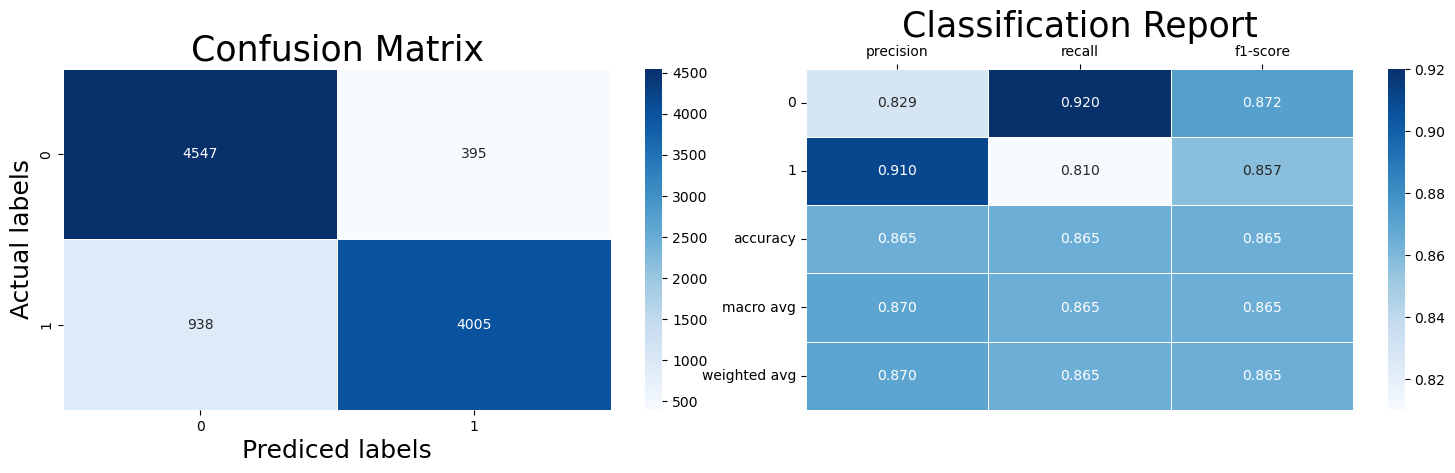

In [104]:
plot_result(predictions)

In [106]:
svm_gscv_accuracy_score = accuracy_score(y_test, predictions)
svm_gscv_accuracy_score

0.8651492159838139

<div style="text-align: center;">
    <h1>Decision Tree</h1>
</div>

In [70]:
# # We will make the Param grid and will only use GridSearchCV as its the Exhaustive search and will give better
# # results rather than using the RandomizedSearchCV

# param_dt = {'criterion' : ['gini', 'entropy'],        # Making the Parameter Grid that will be used by the decision tree
#             'max_depth' : [10 ,50, 100, 200, 350, 450]}

In [72]:
# # Making the Object of the Class Decision tree and and applying the Grid SearchCV on it

# dtc = DecisionTreeClassifier()

# gscvdt = GridSearchCV(estimator = dtc,
#                       param_grid = param_dt,
#                       scoring = 'accuracy')

# gscvdt.fit(X_train, y_train)      # Fitting the model

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, 200, 350, 450]},
             scoring='accuracy')

In [73]:
# # Finding out the best parameters

# gscvdt.best_params_

{'criterion': 'entropy', 'max_depth': 100}

In [74]:
# # Getting the best model for decision tree

# best_dt_gscv = gscvdt.best_estimator_

In [75]:
# # Predicting on the Test Data

# y_pred_dtgscv = best_dt_gscv.predict(X_test)

In [76]:
# # Getting the Confusion Matrix

# confusion_matrix(y_test, y_pred_dtgscv)

array([[4597,  345],
       [ 315, 4628]], dtype=int64)

In [77]:
# # Getting the Accuracy Score

# dt_gscv_accuracy_score = round(accuracy_score(y_test, y_pred_dtgscv), 4)
# dt_gscv_accuracy_score

0.9332

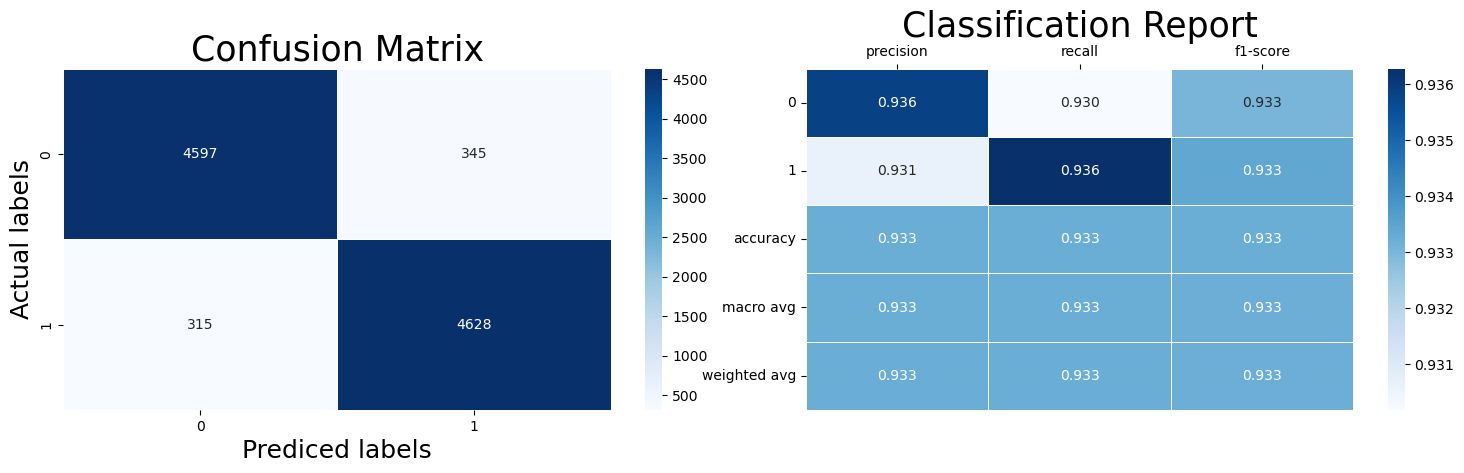

In [78]:
# plot_result(y_pred_dtgscv)


<div style="text-align: center;">
    <h1>Random Forest</h1>
</div>

In [79]:
# # Making the Parameter List for Random Forest which will be passed to teh GridSearchCV 

# param_rf = {'criterion' : ['gini', 'entropy'],
#             'n_estimators' : [10, 30, 50, 100, 200, 250, 300]
#            }

In [81]:
# # Making the object of the Random forest setting up the GridSearchCV and fitting the model

# rf = RandomForestClassifier()                           # Making the object of the class Random Forest

# gscvrf = GridSearchCV(estimator = rf,                   # Making the object of GridSearchCV and Adding the parameters
#                       param_grid = param_rf,
#                       scoring = 'accuracy')

# gscvrf.fit(X_train, y_train)                            # Fitting the Model

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 30, 50, 100, 200, 250, 300]},
             scoring='accuracy')

In [82]:
# # Finding which is the best parameter

# gscvrf.best_params_

{'criterion': 'entropy', 'n_estimators': 250}

In [83]:
# # Getting the best model for Random Forest

# best_rf_gscv = gscvrf.best_estimator_

In [84]:
# # Predicting on the test data

# y_pred_rfgscv = best_rf_gscv.predict(X_test)

In [85]:
# # Getting the confusion Matrix

# confusion_matrix(y_test, y_pred_rfgscv)

array([[4878,   64],
       [ 220, 4723]], dtype=int64)

In [86]:
# # Getting the accuracy of the Trained Model

# rf_gscv_accuracy_score = round(accuracy_score(y_test, y_pred_rfgscv), 4)
# rf_gscv_accuracy_score

0.9713

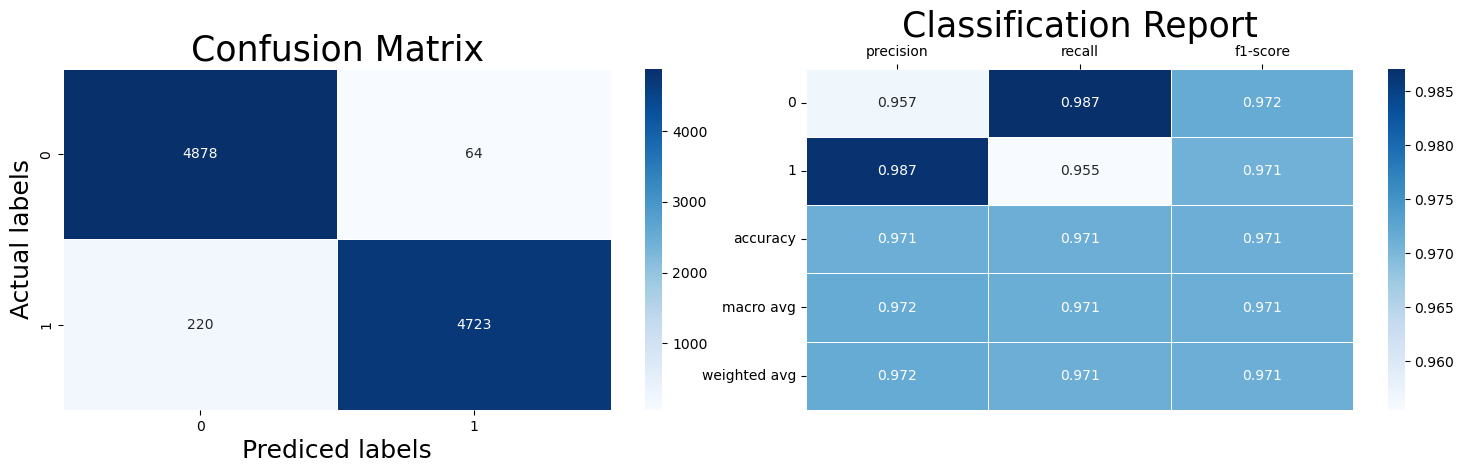

In [87]:
# # Plotting the Confusion Matrix and the Classification Report

# plot_result(y_pred_rfgscv)

<div style="text-align: center;">
    <h1> XGBoosting</h1>
</div>

In [88]:
# # Making the Parameter List for XGBoost Algo

# param_xgb = {'loss' : ['log_loss', 'exponential'],
#              'learning_rate' : [0.01, 0.1, 0.2, 0.3, 0.5],
#              'n_estimators' : [10, 50, 100, 200, 300, 350],
#              }

In [90]:
# xgb = XGBClassifier()                  # Making the object of the class

# gscvxgb = GridSearchCV(estimator = xgb,             # Loading teh parametrs list on to the GrisSearchCV Algo
#                        param_grid = param_xgb,
#                        scoring = 'accuracy')

# gscvxgb.fit(X_train, y_train)                       # Fitting the model

C:\Users\Jeffrey\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:58:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Jeffrey\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:58:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Jeffrey\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:59:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Jeffrey\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarnin

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [10, 50, 100, 200, 300, 350]},
             scoring='accuracy')

In [91]:
# # Finding whcih is the best parameters for the XGBoost algo

# gscvxgb.best_params_

{'learning_rate': 0.2, 'loss': 'log_loss', 'n_estimators': 300}

In [92]:
# # Getting the best model for XGBoost

# best_xgb_gscv = gscvxgb.best_estimator_

In [93]:
# # Predicting on the test data

# y_pred_xgbgscv = best_xgb_gscv.predict(X_test)

In [95]:
# # Plotting the Confusion matrix

# confusion_matrix(y_test, y_pred_xgbgscv)

array([[4869,   73],
       [ 221, 4722]], dtype=int64)

In [96]:
# # Getting the accuracy of the model

# xgb_gscv_accuracy_score = round(accuracy_score(y_test, y_pred_xgbgscv), 4)
# xgb_gscv_accuracy_score

0.9703

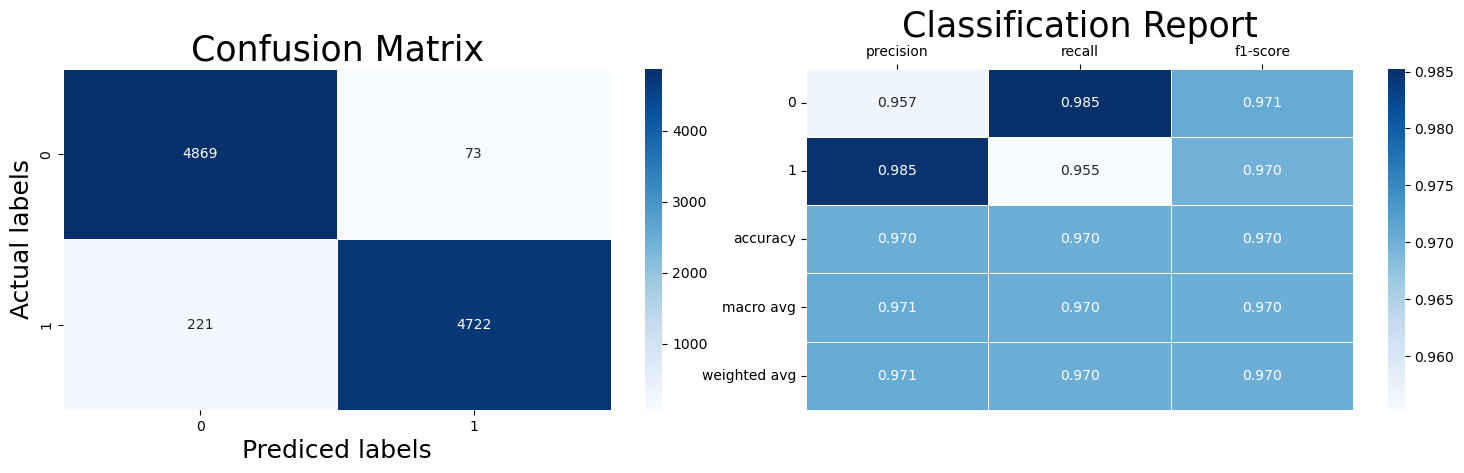

In [97]:
# # Plotting the Confusion Matrix and the Classification Report

# plot_result(y_pred_xgbgscv)

<div style="text-align: center;">
    <h1>Artificial Neural Network ( ANN )</h1>
</div>


In [49]:
X_ann = X_copy
y_ann = y_copy
test_ann = test_copy.copy()

In [50]:
test_ann['person_home_ownership'] = test_ann['person_home_ownership'].map({'RENT' : 1, 
                                                               'MORTGAGE' : 2,
                                                               'OWN' : 3,
                                                               'OTHER' : 4})

In [51]:
test_ann['loan_intent'] = test_ann['loan_intent'].map({'EDUCATION' : 1,
                                           'MEDICAL' : 2,
                                           'VENTURE' : 3,
                                           'PERSONAL' : 4,
                                           'DEBTCONSOLIDATION' : 5,
                                           'HOMEIMPROVEMENT' : 6})

In [52]:
test_ann['loan_grade'] = test_ann['loan_grade'].map({'A' : 1,
                                         'B' : 2,
                                         'C' : 3,
                                         'D' : 4,
                                         'E' : 5,
                                         'F' : 6,
                                         'G' : 7})

In [53]:
test_ann['cb_person_default_on_file'] = test_ann['cb_person_default_on_file'].map({'N' : 1,
                                                                       'Y' : 2})

In [54]:

# Removing the Column from the test data
test_ann.drop(['id'], axis = 1, inplace = True)


In [55]:

# Making the obejct for teh MinMAx Scalar

mms = MinMaxScaler()

X_ann = mms.fit_transform(X_ann)
test_ann = mms.fit_transform(test_ann)

In [56]:

# Making the object for SMOTE as we are implementing Oversmpling of the data

ost_ann = SMOTETomek()
X_osto_ann, y_osto_ann = ost_ann.fit_resample(X_ann, y_ann)

In [57]:
# Splitting the Data into Train and Test Split

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_osto_ann, y_osto_ann, test_size = 0.1, random_state = 20, stratify = y_osto_ann)

In [58]:
# Making the Object of the Sequential

ann = Sequential()

In [59]:
# Makking the Neural Network

ann.add(Dense(11)) # Input Layer

ann.add(Dense(64, activation = 'relu')) # HN2
ann.add(Dense(32, activation = 'relu')) # HN3
ann.add(Dense(8, activation = 'relu'))
ann.add(Dense(2, activation = 'relu'))

ann.add(Dense(1, activation = 'sigmoid')) # Output Layer

In [60]:
# Setting up the Monitring of the model

ann.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy', 'precision']
             )

In [61]:
ann.fit(X_train_ann, y_train_ann, epochs = 30)

Epoch 1/30
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7926 - loss: 0.5059 - precision: 0.8241
Epoch 2/30
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8555 - loss: 0.3691 - precision: 0.8915
Epoch 3/30
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8629 - loss: 0.3446 - precision: 0.9044
Epoch 4/30
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8636 - loss: 0.3394 - precision: 0.9041
Epoch 5/30
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8662 - loss: 0.3292 - precision: 0.9071
Epoch 6/30
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8651 - loss: 0.3264 - precision: 0.9072
Epoch 7/30
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8689 - loss: 0.3207 - precision: 0.9104
Epoch 8/30
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8663 - loss: 0.3198 - precision: 0.9070
Epoch 9/30
2773/2773 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8688 - loss: 0.3115 - precision: 0.9091
Epoch 10/30
2773/2773 ━━━━

In [63]:
loss, accuracy, precision = ann.evaluate(X_test_ann, y_test_ann)

309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8730 - loss: 0.2847 - precision: 0.9067


### Findnig teh Best Threshold value so that we will be able to the binary conversions

In [97]:
# Predict probabilities on the test data
probabilities = ann.predict(X_test_ann).flatten()


309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [98]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_ann, probabilities)

# Compute Youden's J statistic
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

print(f"Best Threshold by Youden's J: {best_threshold}")


Best Threshold by Youden's J: 0.4739816188812256


In [99]:
# Convert probabilities to binary predictions using the best threshold
binary_predictions = (probabilities > best_threshold).astype(int)


In [100]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test_ann, binary_predictions))

# Optional: Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_ann, binary_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4929
           1       0.90      0.84      0.87      4930

    accuracy                           0.87      9859
   macro avg       0.88      0.87      0.87      9859
weighted avg       0.88      0.87      0.87      9859

Confusion Matrix:
[[4481  448]
 [ 787 4143]]


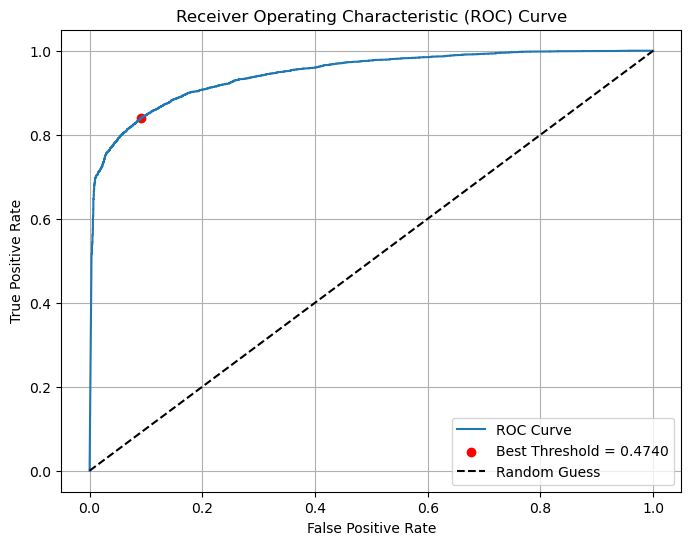

In [101]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[best_index], tpr[best_index], color='red', label=f'Best Threshold = {best_threshold:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<div style="text-align: center;">
    <h1>Final Accuracy Chart</h1>
</div>


In [107]:
# # Making the DataFrame of the Final Accuracy Chart so comparing the results would be easy

# final_accuracy = pd.DataFrame(
# {'Algorithm' : ['Logistic Regression', 'SVM GridSearchCV', 'Decision Tree', 'Random Forest', 'XGBoost'],
#  'Accuracy' : [lor_accuracy_score, svm_gscv_accuracy_score, dt_gscv_accuracy_score,
#                rf_gscv_accuracy_score, xgb_gscv_accuracy_score]}
# )

<function matplotlib.pyplot.show(close=None, block=None)>

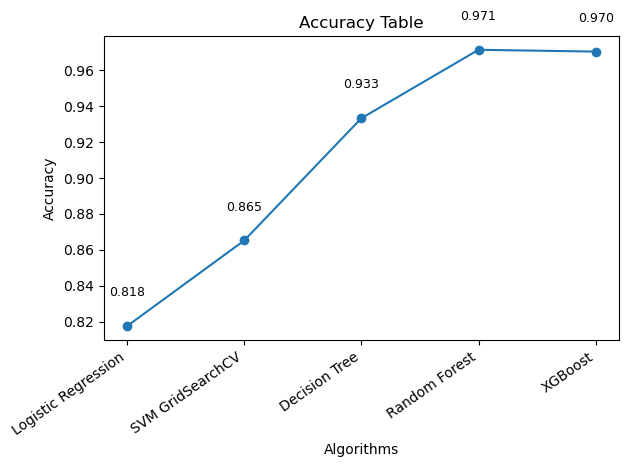

In [108]:
# # plotting the results

# # Add labels to the marker points
# for i, value in enumerate(final_accuracy['Accuracy']):
#     plt.text(final_accuracy['Algorithm'][i], value + (0.015),  # Slightly above the marker
#              f'{value:.3f}', ha='center', va='bottom', fontsize=9, color='black')

# plt.plot(final_accuracy['Algorithm'], final_accuracy['Accuracy'], marker = 'o')
# plt.xlabel('Algorithms')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Table')
# plt.xticks(rotation = 35, ha = 'right')
# plt.tight_layout()
# plt.show

In [131]:
# final_accuracy.style.background_gradient()

,Algorithm,Accuracy
0,Logistic Regression,0.817501
1,SVM GridSearchCV,0.865149
2,Decision Tree,0.933200
3,Random Forest,0.971300
4,XGBoost,0.970300


### Saving the Models of the different algorithm

> __Saving the Logistic Regression Model__

In [112]:

# # Saving the LOR Model
# joblib.dump(lor, 'LOR_Loan_Approval_Prediction.joblib')
# print("Model saved successfully!")


Model saved successfully!


> __Saving the Decision Tree Model__

In [113]:

# # Saving the DT Model
# joblib.dump(gscvdt, 'DT_Loan_Approval_Prediction.joblib')
# print("Model saved successfully!")


Model saved successfully!


> __Saving the Random Forest Model__

In [114]:

# # Saving the RF Model
# joblib.dump(gscvrf, 'RF_Loan_Approval_Prediction.joblib')
# print("Model saved successfully!")


Model saved successfully!


> __Saving the XGB Model__

In [115]:

# # Saving the RF Model
# joblib.dump(gscvxgb, 'XGB_Loan_Approval_Prediction.joblib')
# print("Model saved successfully!")


Model saved successfully!


> __Saving the ANN Model__

In [68]:

# # Saving the ann Model
# joblib.dump(ann, 'ANN_Loan_Approval_Prediction.joblib')
# print("Model saved successfully!")


Model saved successfully!


## Loading the RF Model to test on the 'Test' Data

In [140]:

# Load the saved model
model_RF = joblib.load('RF_Loan_Approval_Prediction.joblib')

print("Model loaded successfully!")

Model loaded successfully!


In [141]:
# Example: Predicting on new data
predictions_RF = model_RF.predict(test)

print(predictions)

[1 0 1 ... 0 0 0]


In [142]:
#Loan_approval_Prediction_RF = pd.DataFrame({'id': test_copy.id.values, 'loan_status': predictions_RF})

In [147]:
#Loan_approval_Prediction_RF.to_csv('Loan_approval_Prediction_RF.csv', index = False)

## Loading the XGBOOST Model to test on the 'Test' Data

In [148]:

# Load the saved model
model_XGB = joblib.load('XGB_Loan_Approval_Prediction.joblib')

print("Model loaded successfully!")

Model loaded successfully!


In [149]:
# Example: Predicting on new data
predictions_XGB = model_XGB.predict(test)

print(predictions)

[1 0 1 ... 0 0 0]


In [150]:
# Loan_approval_Prediction_XGB = pd.DataFrame({'id': test_copy.id.values, 'loan_status': predictions_XGB})

In [151]:
# Loan_approval_Prediction_XGB.to_csv('Loan_approval_Prediction_XGB.csv', index = False)

## Loading the DT Model to test on the 'Test' Data

In [152]:

# Load the saved model
model_DT = joblib.load('DT_Loan_Approval_Prediction.joblib')

print("Model loaded successfully!")

Model loaded successfully!


In [153]:
# Example: Predicting on new data
predictions_DT = model_DT.predict(test)

print(predictions)

[1 0 1 ... 0 0 0]


In [154]:
# Loan_approval_Prediction_DT = pd.DataFrame({'id': test_copy.id.values, 'loan_status': predictions_DT})

In [155]:
# Loan_approval_Prediction_DT.to_csv('Loan_approval_Prediction_DT.csv', index = False)

## Loading the ANN Model to test on the 'Test' Data

In [102]:

# Load the saved model
model_ANN = joblib.load('ANN_Loan_Approval_Prediction.joblib')

print("Model loaded successfully!")

Model loaded successfully!


In [103]:
# Example: Predicting on new data
predictions_ANN = model_ANN.predict(test_ann)

print(predictions_ANN)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[0.9912733 ]
 [0.05135006]
 [0.7784395 ]
 ...
 [0.00739993]
 [0.4210896 ]
 [0.9912733 ]]


In [104]:
predictions_ANN

array([[0.9912733 ],
       [0.05135006],
       [0.7784395 ],
       ...,
       [0.00739993],
       [0.4210896 ],
       [0.9912733 ]], dtype=float32)

In [105]:
# Define the threshold
threshold = 0.4739816188812256

# Apply the threshold to get binary predictions
binary_predictions_ann = (predictions_ANN > threshold).astype(int)

# If predictions_ANN has shape (n_samples, 1), you might want to flatten it
binary_predictions_ann = binary_predictions_ann.flatten()

print(binary_predictions_ann)

[1 0 1 ... 0 0 1]


In [106]:
#Loan_approval_Prediction_ANN = pd.DataFrame({'id': test_copy.id.values, 'loan_status': binary_predictions_ann})

In [107]:
#Loan_approval_Prediction_ANN.to_csv('Loan_approval_Prediction_ANN_th_0.4739.csv', index = False)